# Insurance prediction

This is a problem statement for customers of an insurance company. Each data point is one customer. The group represents the number of accidents the customer has been involved with in the past .

* 0 - red: many accidents
* 1 - green: few or no accidents
* 2 - yellow: in the middle  

Since the output feature has discreate value so Its a classification problem

## Importing Libs

In [26]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%pylab inline

import pandas as pd
import matplotlib.pyplot as plt
plt.xkcd()

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn import tree

Populating the interactive namespace from numpy and matplotlib


# Loading and exploring our data set      

In [2]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')
df.head()

,speed,age,miles,group
0,98.0,44.0,25.0,1
1,118.0,54.0,24.0,1
2,111.0,26.0,34.0,0
3,97.0,25.0,10.0,2
4,114.0,38.0,22.0,1


In [3]:
df.shape

(1500, 4)

In [4]:
df.describe()

,speed,age,miles,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,122.492667,44.980667,30.434000,0.998667
std,17.604333,17.130400,15.250815,0.816768
min,68.000000,16.000000,1.000000,0.000000
25%,108.000000,32.000000,18.000000,0.000000
50%,120.000000,42.000000,29.000000,1.000000
75%,137.000000,55.000000,42.000000,2.000000
max,166.000000,100.000000,84.000000,2.000000


###  creating independant and dependant feature from dataset

In [5]:
# Output feature
y=df['group']
y.head()

0    1
1    1
2    0
3    2
4    1
Name: group, dtype: int64

In [6]:
# since 'group' is now the label we want to predict, we need to remove it from the training data 
df.drop('group', axis='columns', inplace=True)
X = df
X.head()

,speed,age,miles
0,98.0,44.0,25.0
1,118.0,54.0,24.0
2,111.0,26.0,34.0
3,97.0,25.0,10.0
4,114.0,38.0,22.0


### Splitting independant and dependant data in to train and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1200, 3) (1200,) (300, 3) (300,)


In [8]:
# Creating object for Decision Tree algorithm
clf = DecisionTreeClassifier()
%time clf.fit(X_train, y_train)
# finding max depth
print("max depth is " , clf.tree_.max_depth )

Wall time: 44.7 ms
max depth is  18


In [9]:
print( " Training score " , round(clf.score(X_train, y_train)*100 , 2))
print( " Testing score " , round(clf.score(X_test, y_test)*100 , 2))

 Training score  99.92
 Testing score  70.67


In [10]:
# Sending Decision tree parameters to imrove testing score ( Avoiding over fitting)
clf = DecisionTreeClassifier(max_depth=10,
                              min_samples_leaf=3,
                              min_samples_split=2)
%time clf.fit(X_train, y_train)

print("max depth is " , clf.tree_.max_depth )

Wall time: 27.6 ms
max depth is  10


In [11]:
print( " Training score " , round(clf.score(X_train, y_train)*100 , 2))
print( " Testing score " , round(clf.score(X_test, y_test)*100 , 2))

 Training score  86.33
 Testing score  73.67


## Evaludate a score by cross-validation

In [12]:
scores = cross_val_score(clf, X, y, n_jobs=-1)
scores

array([0.75333333, 0.75666667, 0.76666667, 0.70666667, 0.76666667])

## Tuning parameters and finding best model

In [13]:
param_grid = {
    'max_depth': list(range(2, 25)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}

In [14]:
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, n_jobs=-1)
%time clf.fit(X, y)
best_params = clf.best_params_
print("Best params ",best_params)

Wall time: 46.2 s
Best params  {'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 3}


In [31]:
clf = DecisionTreeClassifier(max_depth=9,
                              min_samples_leaf=6,
                              min_samples_split=4)
%time clf.fit(X_train, y_train)
print("max depth is " , clf.tree_.max_depth )

Wall time: 7.15 ms
max depth is  9


In [16]:
print( " Training score " , round(clf.score(X_train, y_train)*100 , 2))
print( " Testing score " , round(clf.score(X_test, y_test)*100 , 2))

 Training score  82.25
 Testing score  76.0


In [17]:
# Evaludate a score by cross-validation
scores = cross_val_score(clf, X, y, n_jobs=-1)
scores

array([0.75333333, 0.78333333, 0.78666667, 0.73      , 0.76      ])

### Predicting the testdata with trained model

In [18]:
test_pred = clf.predict(X_test)

# Classification scores & Model Evaluation

In [19]:
# Finding accuracy
metrics.accuracy_score(y_test ,test_pred)

0.76

In [20]:
# Finding confusion matrix
metrics.confusion_matrix(y_test, test_pred)

array([[81, 10,  9],
       [10, 76, 14],
       [10, 19, 71]], dtype=int64)

In [21]:
# Finding precision score
metrics.precision_score(y_test, test_pred, average='macro')

0.7603696235884986

In [22]:
# Finding recall score
metrics.recall_score(y_test, test_pred,average='macro')

0.7600000000000001

In [23]:
# Finding classification report
print(metrics.classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       100
           1       0.72      0.76      0.74       100
           2       0.76      0.71      0.73       100

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [24]:
# Finding precision recall fscore support
metrics.precision_recall_fscore_support(y_test, test_pred)

(array([0.8019802 , 0.72380952, 0.75531915]),
 array([0.81, 0.76, 0.71]),
 array([0.80597015, 0.74146341, 0.73195876]),
 array([100, 100, 100], dtype=int32))

## Predicting with new sample data point

In [25]:
input = [[135.0, 48.0,25.5]]
clf.predict(input)

array([2], dtype=int64)

## Printing the tree 

In [41]:
clf = DecisionTreeClassifier(max_depth=9,
                              min_samples_leaf=6,
                              min_samples_split=4)
%time clf.fit(X_train, y_train)
print("max depth is " , clf.tree_.max_depth )

Wall time: 14.7 ms
max depth is  9


[Text(650.1591467696629, 516.4200000000001, 'X[0] <= 146.5\ngini = 0.667\nsamples = 1200\nvalue = [401, 400, 399]'),
 Text(510.3407654494382, 462.06000000000006, 'X[1] <= 66.5\ngini = 0.66\nsamples = 1052\nvalue = [283, 389, 380]'),
 Text(315.344452247191, 407.70000000000005, 'X[1] <= 35.5\ngini = 0.636\nsamples = 892\nvalue = [173, 385, 334]'),
 Text(130.4873595505618, 353.34000000000003, 'X[0] <= 105.5\ngini = 0.601\nsamples = 320\nvalue = [104, 50, 166]'),
 Text(61.12921348314607, 298.98, 'X[2] <= 21.5\ngini = 0.191\nsamples = 143\nvalue = [3, 12, 128]'),
 Text(28.213483146067418, 244.62, 'X[1] <= 26.5\ngini = 0.079\nsamples = 122\nvalue = [0, 5, 117]'),
 Text(18.808988764044944, 190.26000000000005, 'gini = 0.0\nsamples = 75\nvalue = [0, 0, 75]'),
 Text(37.61797752808989, 190.26000000000005, 'X[2] <= 10.5\ngini = 0.19\nsamples = 47\nvalue = [0, 5, 42]'),
 Text(18.808988764044944, 135.90000000000003, 'X[0] <= 99.5\ngini = 0.375\nsamples = 12\nvalue = [0, 3, 9]'),
 Text(9.404494382022

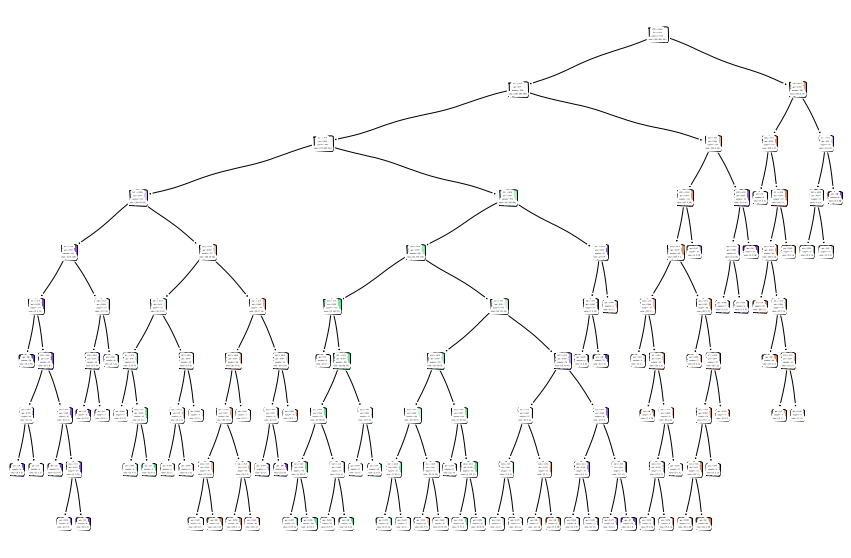

In [42]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [32]:
clf

DecisionTreeClassifier(max_depth=9, min_samples_leaf=6, min_samples_split=4)

## post prunning

In [45]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas , impurities = path.ccp_alphas  , path.impurities

In [46]:
path

{'ccp_alphas': array([0.00000000e+00, 5.80808081e-05, 7.63125763e-05, 1.30023641e-04,
        1.61172161e-04, 2.15617716e-04, 2.39018088e-04, 3.35317460e-04,
        3.72501612e-04, 4.48717949e-04, 5.49691050e-04, 5.55555556e-04,
        5.76506194e-04, 6.01851852e-04, 6.34920635e-04, 6.36604775e-04,
        6.38794567e-04, 6.66666667e-04, 6.90188896e-04, 7.01340190e-04,
        7.53968254e-04, 7.82982045e-04, 9.55026455e-04, 1.06998557e-03,
        1.08333333e-03, 1.25000000e-03, 1.56804126e-03, 1.79166667e-03,
        2.05138889e-03, 2.08649643e-03, 2.10669863e-03, 2.22829132e-03,
        2.39428071e-03, 2.47786690e-03, 2.56396856e-03, 2.60524098e-03,
        2.88511060e-03, 3.04313725e-03, 3.50200417e-03, 4.05423280e-03,
        4.40857412e-03, 5.12069691e-03, 5.13491354e-03, 5.18620269e-03,
        5.35185185e-03, 5.76262626e-03, 6.03705069e-03, 7.78338803e-03,
        7.92452518e-03, 9.15090001e-03, 1.41966343e-02, 1.76824251e-02,
        2.10360073e-02, 3.19373543e-02, 4.78629827